In [1]:
from qiskit import *
import qiskit.quantum_info as qi
import numpy as np
from qiskit.visualization import *
from math import sqrt, pi
from IPython.display import display, Math
svsim = Aer.get_backend('aer_simulator') 

# Analysing the classical case
A strategy in the classical case is equivalent to 3 functions, $A, B, C: \{0, 1\}\rightarrow \{0, 1\}$, such that $(a, b, c) = (A(r), B(s), C(t))$.<br>
$A, B, C$ can only be one of the 4 functions: ($f_1(0)=0, f_1(1) = 0$), ($f_2(0)=1, f_2(1) = 1$), ($f_3(0)=0, f_3(1) = 1$), ($f_4(0)=1, f_4(1) = 0$)<br>
Consider the case, $A = B = C = f_4$, i.e. all return the negation of the qubit they receive.<br>
Whenever only 2 of the players have a 1, $a\oplus b\oplus c$ will be $1\oplus0\oplus0 = 1\lor1\lor0$. But if all have a 0, they lose since $1\oplus 1\oplus 1 = 1 \neq 0\lor0\lor0 = 0$.<br>
$$\text{Hence, } P_{\text{win}} = \frac{3}{4}$$
To show that there is no better strategy, we show that they cannot win with a higher chance $=1$.<br>
Consider the following $A(0)\oplus B(0)\oplus C(0) = 0$, $A(1)\oplus B(1)\oplus C(0) = 1$ and $A(1)\oplus B(0)\oplus C(1) = 1$, $A(0)\oplus B(1)\oplus C(1) = 1$<br>
In the first 2 equations, flipping the arguments of $A, B$ reverses the $\oplus$ of their result while in the last 2, it preserves it. This is not possible using any permutation of $f_1, f_2, f_3, f_4$, hence it is impossible to satisfy all 4 equations, i.e. no better strategy exists.

In [2]:
def strategy(qc, given):
    for i in range(3):
        if given[i]:
            qc.h(i)

# The Quantum Strategy
We aim to have the entangled qubits such that they can "distinguish" between $000$ and $011, 101, 110$.<br>
So, we choose: $\psi = \frac{1}{2}(|000\rangle -|011\rangle -|101\rangle -|110\rangle)$.<br>
Now, consider what happens when we apply $H^{\otimes2}$ to $|00\rangle - |11\rangle $ and $|01\rangle + |10\rangle$:
$$H^{\otimes 2} (|00\rangle - |11\rangle) \propto |01\rangle + |10\rangle$$
$$H^{\otimes 2} (|01\rangle + |10\rangle) \propto |00\rangle - |11\rangle$$
As can be seen, the $\oplus$ of any of the superposed states flips due to this operation.<br>
And, $\psi$ is basically any one of the qubits in $0$ with the other 2 in $|00\rangle - |11\rangle$ superposed with it in $1$ with the other 2 in $|01\rangle + |10\rangle$.<br>
Hence, $H$ applied to any 2 qubits in $\psi$ gives a superposition of states with odd qubits in $1$, while doing no operation gives a superposition of states with even qubits in $1$.<br>
Therefore the winning strategy is to begin in $\psi$. Then, if any player receives a $1$ from the referee, s/he applies $H$ to his/her qubit. In the end, each player measures their qubit and returns the result.<br>
Using this strategy, the players always win!

# Preparing the entangled state
To do this, we use the fact that $H^{\otimes 3}(|000\rangle + |111\rangle)$ gives an equal superposition of 3-qubits states with even $1$'s.<br>
Then, doing $CZ$ operations between all 3 pairs adds a $-$ to the states with 2 $1$'s, leaving the $|000\rangle$ state as it is.

# Case 1: all receive 0's

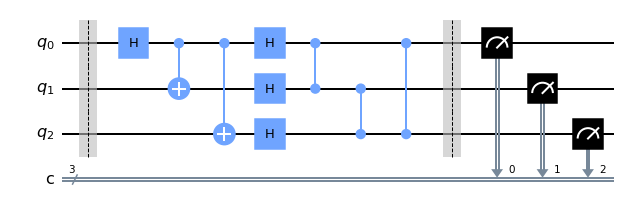

In [3]:
qc = QuantumCircuit(3, 3)
qc.barrier()
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.h([0, 1, 2])
qc.cz(0, 1)
#qc.h(1), qc.cx(0, 1), qc.h(1): implementation of cz using h and cx
qc.cz(1, 2)
qc.cz(0, 2)
qc.barrier()
strategy(qc, [0, 0, 0])
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw('mpl')

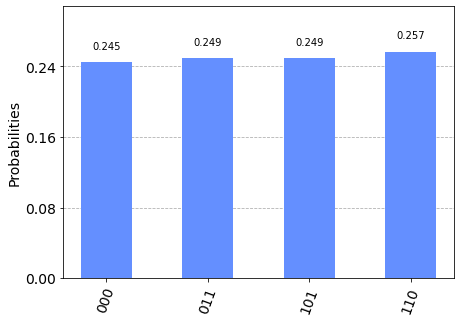

In [4]:
counts = svsim.run(assemble(qc)).result().get_counts()
plot_histogram(counts)

# Case 2: 2 players get a 1, the other gets a 0

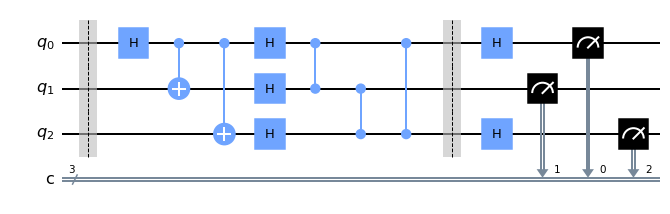

In [5]:
qc = QuantumCircuit(3, 3)
qc.barrier()
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.h([0, 1, 2])
qc.cz(0, 1)
#qc.h(1), qc.cx(0, 1), qc.h(1)
qc.cz(1, 2)
qc.cz(0, 2)
qc.barrier()
strategy(qc, [1, 0, 1])
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw('mpl')

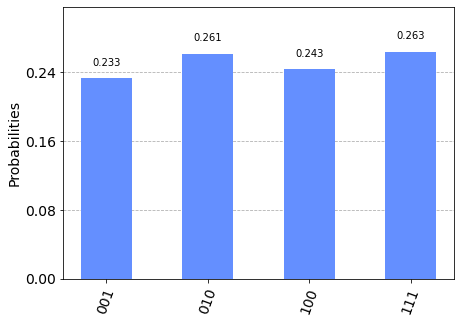

In [6]:
counts = svsim.run(assemble(qc)).result().get_counts()
plot_histogram(counts)

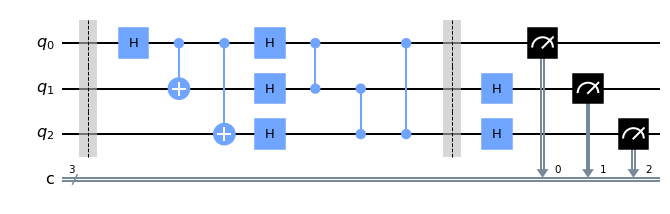

In [7]:
qc = QuantumCircuit(3, 3)
qc.barrier()
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.h([0, 1, 2])
qc.cz(0, 1)
#qc.h(1), qc.cx(0, 1), qc.h(1)
qc.cz(1, 2)
qc.cz(0, 2)
qc.barrier()
strategy(qc, [0, 1, 1])
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw('mpl')

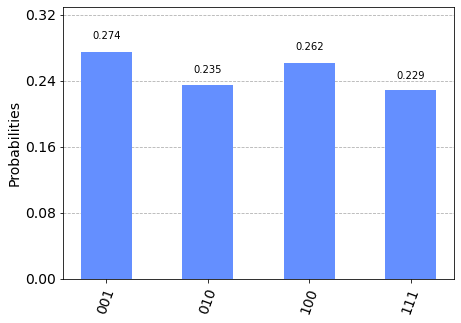

In [8]:
counts = svsim.run(assemble(qc)).result().get_counts()
plot_histogram(counts)

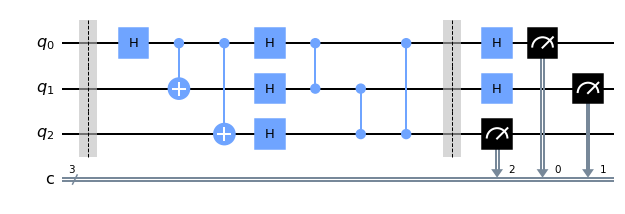

In [9]:
qc = QuantumCircuit(3, 3)
qc.barrier()
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.h([0, 1, 2])
qc.cz(0, 1)
#qc.h(1), qc.cx(0, 1), qc.h(1)
qc.cz(1, 2)
qc.cz(0, 2)
qc.barrier()
strategy(qc, [1, 1, 0])
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw('mpl')

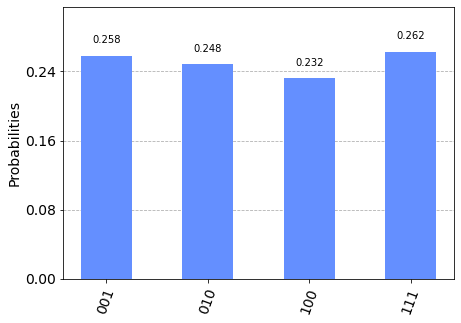

In [10]:
counts = svsim.run(assemble(qc)).result().get_counts()
plot_histogram(counts)